In [1]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder.appName('GroundWaterApp').getOrCreate()
df = spark.read.csv('/GroundWater/Iron.csv', inferSchema=True, header = True)

In [3]:
df.take(1)

[Row(Sl No=1, District=u'Bagalkot', Block=u'Badami', Location=u'Kulgeri', Iron=2.7)]

In [4]:
df.registerTempTable('IronCopy')

In [5]:
df.show(100)

+-----+----------------+-----------------+--------------------+----+
|Sl No|        District|            Block|            Location|Iron|
+-----+----------------+-----------------+--------------------+----+
|    1|        Bagalkot|           Badami|             Kulgeri| 2.7|
|    2|        Bagalkot|           Badami|            Patadkal| 1.4|
|    3|        Bagalkot|         Bagalkot|               Bevur| 4.8|
|    4|        Bagalkot|        Hunugunda|         Binjawadige| 4.4|
|    5|        Bagalkot|        Hunugunda|               Ilkal|5.01|
|    6|        Bagalkot|           Mudhol|            Belagali| 3.2|
|    7|       Bangalore|      Devanahalli|      Viswanathapura| 6.0|
|    8|       Bangalore|       Kanakapura|             Hegnuru| 1.6|
|    9|       Bangalore|           Magadi|              Magadi| 1.5|
|   10|          Belary|           Hospet|       Sotrigangapur| 1.3|
|   11|          Belary|        Siriguppa|             Bailuru| 1.0|
|   12|         Belgaum|          

In [7]:
df.printSchema()

root
 |-- Sl No: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Iron: double (nullable = true)



In [8]:
df.describe()

DataFrame[summary: string, Sl No: string, District: string, Block: string, Location: string, Iron: string]

In [9]:
df.describe('Iron').show()

+-------+-----------------+
|summary|             Iron|
+-------+-----------------+
|  count|              127|
|   mean| 3.89015748031496|
| stddev|6.418308260545302|
|    min|              1.0|
|    max|             65.0|
+-------+-----------------+



In [11]:
df.filter(df['Iron'] > 2.0).show(50)

+-----+----------------+------------------+--------------------+----+
|Sl No|        District|             Block|            Location|Iron|
+-----+----------------+------------------+--------------------+----+
|    1|        Bagalkot|            Badami|             Kulgeri| 2.7|
|    3|        Bagalkot|          Bagalkot|               Bevur| 4.8|
|    4|        Bagalkot|         Hunugunda|         Binjawadige| 4.4|
|    5|        Bagalkot|         Hunugunda|               Ilkal|5.01|
|    6|        Bagalkot|            Mudhol|            Belagali| 3.2|
|    7|       Bangalore|       Devanahalli|      Viswanathapura| 6.0|
|   12|         Belgaum|            Athani|              Badchi| 6.2|
|   16|         Belgaum|            Athani|        Parthanhalli| 2.2|
|   24|         Belgaum|          Khanapur|               Gunji| 5.5|
|   25|         Belgaum|          Khanapur|            Khanapur|16.2|
|   26|         Belgaum|          Khanapur|               Londa|10.2|
|   27|         Belg

In [12]:
import pandas as pd
pandas_df = df.toPandas()

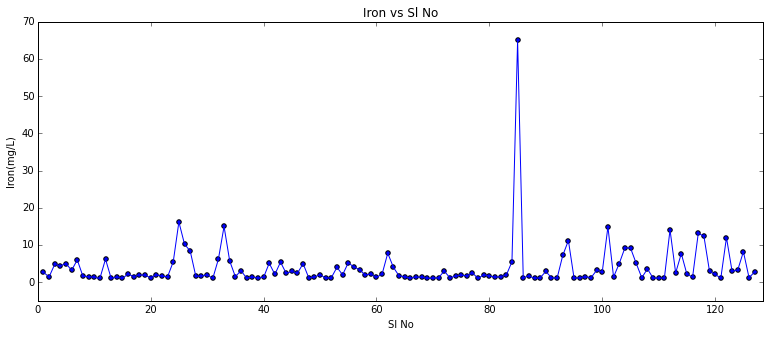

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(13,5),dpi=100)
plt.plot(pandas_df['Sl No'],pandas_df['Iron'])
plt.scatter(pandas_df['Sl No'],pandas_df['Iron'])
plt.xlabel('Sl No',color='black')
plt.ylabel('Iron(mg/L)',color='black')
plt.title('Iron vs Sl No',color='black')
plt.xlim(0,128.5)
plt.ylim(-5,70)
plt.savefig('Scatter_Iron')

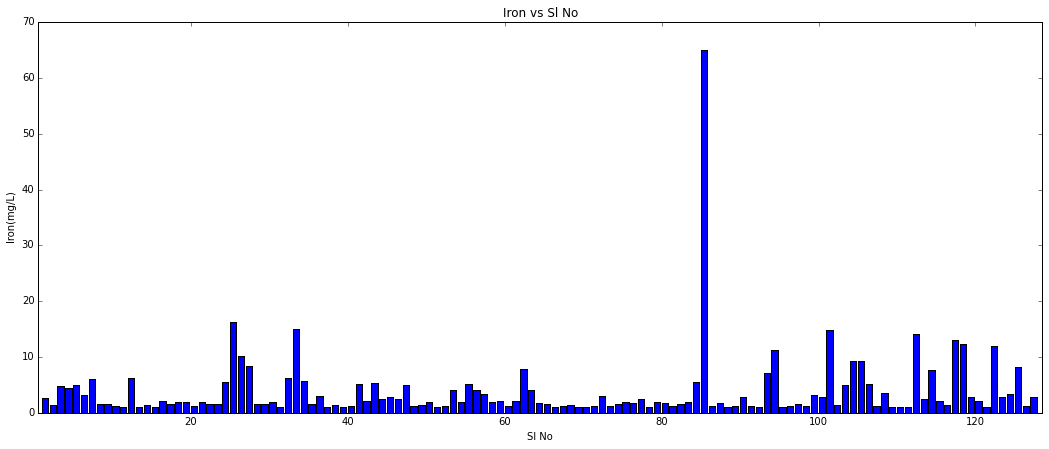

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(18,7),dpi=100)
plt.bar(pandas_df['Sl No'],pandas_df['Iron'],color=['blue'])
plt.xlabel('Sl No',color='black')
plt.ylabel('Iron(mg/L)',color='black')
plt.title('Iron vs Sl No',color='black')
plt.xlim(0.5,128.5)
plt.savefig('bar_Iron')

In [19]:
ironlowlevel = spark.sql("SELECT District,Block,Iron FROM ironCopy WHERE Iron BETWEEN 1.0 AND 1.2")
ironlowlevel.show(50)

+----------------+---------------+----+
|        District|          Block|Iron|
+----------------+---------------+----+
|          Belary|      Siriguppa| 1.0|
|         Belgaum|         Athani|1.04|
|         Belgaum|         Athani|1.04|
|         Belgaum|          Gokak| 1.2|
|           Bidar|          Bidar| 1.0|
|     Chikmagalur|          Koppa| 1.1|
|     Chikmagalur|      Shringeri| 1.1|
|Dakshina Kannada|        Bantwal| 1.2|
|Dakshina Kannada|         Puttur| 1.1|
|Dakshina Kannada|         Puttur| 1.2|
|        Gulbarga|       Afzalpur| 1.1|
|        Gulbarga|       Chitapur| 1.0|
|        Gulbarga|        Jevargi| 1.1|
|        Gulbarga|        Jevargi| 1.2|
|        Gulbarga|          Sedam| 1.2|
|        Gulbarga|       Shorapur| 1.0|
|          Hassan|Channarayapatna| 1.2|
|          Haveri|     Ranebennur| 1.0|
|          Kodagu|        Mercara| 1.2|
|           Kolar|          Kolar| 1.2|
|          Koppal|     Gangavathi| 1.1|
|          Koppal|       Kushtagi| 1.1|


In [16]:
ironmedlevel = spark.sql("SELECT District,Block,Iron FROM ironCopy WHERE Iron BETWEEN 1.2 AND 10")
ironmedlevel.show(100)

+----------------+------------------+----+
|        District|             Block|Iron|
+----------------+------------------+----+
|        Bagalkot|            Badami| 2.7|
|        Bagalkot|            Badami| 1.4|
|        Bagalkot|          Bagalkot| 4.8|
|        Bagalkot|         Hunugunda| 4.4|
|        Bagalkot|         Hunugunda|5.01|
|        Bagalkot|            Mudhol| 3.2|
|       Bangalore|       Devanahalli| 6.0|
|       Bangalore|        Kanakapura| 1.6|
|       Bangalore|            Magadi| 1.5|
|          Belary|            Hospet| 1.3|
|         Belgaum|            Athani| 6.2|
|         Belgaum|            Athani|1.33|
|         Belgaum|            Athani| 2.2|
|         Belgaum|            Athani| 1.5|
|         Belgaum|        Bailhongal|1.95|
|         Belgaum|             Gokak|1.87|
|         Belgaum|             Gokak| 1.2|
|         Belgaum|             Gokak| 2.0|
|         Belgaum|             Gokak| 1.6|
|         Belgaum|           Hukkeri|1.49|
|         B

In [17]:
ironhighlevel = spark.sql("SELECT District,Block,Iron FROM ironCopy WHERE Iron > 10")
ironhighlevel.show()

+--------+---------------+----+
|District|          Block|Iron|
+--------+---------------+----+
| Belgaum|       Khanapur|16.2|
| Belgaum|       Khanapur|10.2|
| Bijapur|        Bijapur|15.0|
|  Hassan|Channarayapatna|65.0|
|  Koppal|       Kushtagi|11.2|
| Raichur|       Deodurga|14.9|
| Raichur|      Sindhanur|14.1|
|  Tumkur|          Gubbi|13.1|
|  Tumkur|      Koratgere|12.4|
|  Tumkur|       Pavagada|12.0|
+--------+---------------+----+



In [18]:
ironlowlevel.write.csv('ir_low.csv')
ironmedlevel.write.csv('ir_med.csv')
ironhighlevel.write.csv('ir_high.csv')

In [21]:
df1 = spark.read.csv('/user/SYSTEM/ir_low.csv/low.csv', inferSchema=False, header = False)
df1.show()

+----------------+---------------+----+
|             _c0|            _c1| _c2|
+----------------+---------------+----+
|          Belary|      Siriguppa| 1.0|
|         Belgaum|         Athani|1.04|
|         Belgaum|         Athani|1.04|
|         Belgaum|          Gokak| 1.2|
|           Bidar|          Bidar| 1.0|
|     Chikmagalur|          Koppa| 1.1|
|     Chikmagalur|      Shringeri| 1.1|
|Dakshina Kannada|        Bantwal| 1.2|
|Dakshina Kannada|         Puttur| 1.1|
|Dakshina Kannada|         Puttur| 1.2|
|        Gulbarga|       Afzalpur| 1.1|
|        Gulbarga|       Chitapur| 1.0|
|        Gulbarga|        Jevargi| 1.1|
|        Gulbarga|        Jevargi| 1.2|
|        Gulbarga|          Sedam| 1.2|
|        Gulbarga|       Shorapur| 1.0|
|          Hassan|Channarayapatna| 1.2|
|          Haveri|     Ranebennur| 1.0|
|          Kodagu|        Mercara| 1.2|
|           Kolar|          Kolar| 1.2|
+----------------+---------------+----+
only showing top 20 rows



In [22]:
df1 = df1.withColumnRenamed("_c0","District")
df1 = df1.withColumnRenamed("_c1","Block")
df1 = df1.withColumnRenamed("_c2","Fluoride")

In [23]:
df1.show()

+----------------+---------------+--------+
|        District|          Block|Fluoride|
+----------------+---------------+--------+
|          Belary|      Siriguppa|     1.0|
|         Belgaum|         Athani|    1.04|
|         Belgaum|         Athani|    1.04|
|         Belgaum|          Gokak|     1.2|
|           Bidar|          Bidar|     1.0|
|     Chikmagalur|          Koppa|     1.1|
|     Chikmagalur|      Shringeri|     1.1|
|Dakshina Kannada|        Bantwal|     1.2|
|Dakshina Kannada|         Puttur|     1.1|
|Dakshina Kannada|         Puttur|     1.2|
|        Gulbarga|       Afzalpur|     1.1|
|        Gulbarga|       Chitapur|     1.0|
|        Gulbarga|        Jevargi|     1.1|
|        Gulbarga|        Jevargi|     1.2|
|        Gulbarga|          Sedam|     1.2|
|        Gulbarga|       Shorapur|     1.0|
|          Hassan|Channarayapatna|     1.2|
|          Haveri|     Ranebennur|     1.0|
|          Kodagu|        Mercara|     1.2|
|           Kolar|          Kola

In [26]:
df2 = spark.read.csv('/user/SYSTEM/ir_high.csv/high.csv', inferSchema=False, header = False)
df2.show()

+-------+---------------+----+
|    _c0|            _c1| _c2|
+-------+---------------+----+
|Belgaum|       Khanapur|16.2|
|Belgaum|       Khanapur|10.2|
|Bijapur|        Bijapur|15.0|
| Hassan|Channarayapatna|65.0|
| Koppal|       Kushtagi|11.2|
|Raichur|       Deodurga|14.9|
|Raichur|      Sindhanur|14.1|
| Tumkur|          Gubbi|13.1|
| Tumkur|      Koratgere|12.4|
| Tumkur|       Pavagada|12.0|
+-------+---------------+----+



In [27]:
df2 = df2.withColumnRenamed("_c0","District")
df2 = df2.withColumnRenamed("_c1","Block")
df2 = df2.withColumnRenamed("_c2","Fluoride")
df2.show()

+--------+---------------+--------+
|District|          Block|Fluoride|
+--------+---------------+--------+
| Belgaum|       Khanapur|    16.2|
| Belgaum|       Khanapur|    10.2|
| Bijapur|        Bijapur|    15.0|
|  Hassan|Channarayapatna|    65.0|
|  Koppal|       Kushtagi|    11.2|
| Raichur|       Deodurga|    14.9|
| Raichur|      Sindhanur|    14.1|
|  Tumkur|          Gubbi|    13.1|
|  Tumkur|      Koratgere|    12.4|
|  Tumkur|       Pavagada|    12.0|
+--------+---------------+--------+



In [28]:
df3 = spark.read.csv('/user/SYSTEM/ir_med.csv/med.csv', inferSchema=False, header = False)
df3.show()

+---------+-----------+----+
|      _c0|        _c1| _c2|
+---------+-----------+----+
| Bagalkot|     Badami| 2.7|
| Bagalkot|     Badami| 1.4|
| Bagalkot|   Bagalkot| 4.8|
| Bagalkot|  Hunugunda| 4.4|
| Bagalkot|  Hunugunda|5.01|
| Bagalkot|     Mudhol| 3.2|
|Bangalore|Devanahalli| 6.0|
|Bangalore| Kanakapura| 1.6|
|Bangalore|     Magadi| 1.5|
|   Belary|     Hospet| 1.3|
|  Belgaum|     Athani| 6.2|
|  Belgaum|     Athani|1.33|
|  Belgaum|     Athani| 2.2|
|  Belgaum|     Athani| 1.5|
|  Belgaum| Bailhongal|1.95|
|  Belgaum|      Gokak|1.87|
|  Belgaum|      Gokak| 1.2|
|  Belgaum|      Gokak| 2.0|
|  Belgaum|      Gokak| 1.6|
|  Belgaum|    Hukkeri|1.49|
+---------+-----------+----+
only showing top 20 rows



In [29]:
df3 = df3.withColumnRenamed("_c0","District")
df3 = df3.withColumnRenamed("_c1","Block")
df3 = df3.withColumnRenamed("_c2","Fluoride")
df3.show()

+---------+-----------+--------+
| District|      Block|Fluoride|
+---------+-----------+--------+
| Bagalkot|     Badami|     2.7|
| Bagalkot|     Badami|     1.4|
| Bagalkot|   Bagalkot|     4.8|
| Bagalkot|  Hunugunda|     4.4|
| Bagalkot|  Hunugunda|    5.01|
| Bagalkot|     Mudhol|     3.2|
|Bangalore|Devanahalli|     6.0|
|Bangalore| Kanakapura|     1.6|
|Bangalore|     Magadi|     1.5|
|   Belary|     Hospet|     1.3|
|  Belgaum|     Athani|     6.2|
|  Belgaum|     Athani|    1.33|
|  Belgaum|     Athani|     2.2|
|  Belgaum|     Athani|     1.5|
|  Belgaum| Bailhongal|    1.95|
|  Belgaum|      Gokak|    1.87|
|  Belgaum|      Gokak|     1.2|
|  Belgaum|      Gokak|     2.0|
|  Belgaum|      Gokak|     1.6|
|  Belgaum|    Hukkeri|    1.49|
+---------+-----------+--------+
only showing top 20 rows

